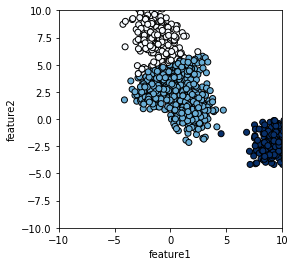

In [24]:
from sklearn.datasets import make_blobs # we should have data for clastering
import matplotlib.pyplot as plt # visualization
import numpy as np # calculations and storage
from sklearn.cluster import KMeans

# help functions for visualization
def Scat_graph(X1, X2, clusters = 'b', num_of_clusters = '', i = 10):
    plt.figure(figsize = (4, 4))
    plt.xlabel('feature1' + num_of_clusters)
    plt.ylabel('feature2')
    plt.xlim([-i, i])
    plt.ylim([-i, i])
    plt.scatter(x = X1, y = X2, c = clusters, edgecolors = 'black', cmap = 'Blues')
    
def Scat_graph_comp(X1, X2, X, strin):    
    plt.figure(1, figsize = (18, 6))
    for i in range(131,134):
        clusters = KMeans(n_clusters = ((i%10) + 1), random_state = 0, init = strin).fit_predict(X)
        plt.subplot(i)
        plt.xlabel('feature1(' + str((i%10) + 1) + ' clusters) ')
        plt.ylabel('feature2')
        plt.xlim([-10, 10])
        plt.ylim([-10, 10])
        plt.scatter(x = X1, y = X2, c = clusters, edgecolors = 'black', cmap = 'Blues')
    plt.suptitle(strin)
    plt.show()
    
n_samples = 1000
n_features = 2
random_state = 0
centers = 5

X,y = make_blobs(n_samples = n_samples, n_features = n_features, centers = centers, random_state = random_state)
clusters = KMeans(n_clusters = 3, random_state = 0, init = 'random').fit_predict(X)
Scat_graph(X[:,0], X[:,1], clusters)# Just to check


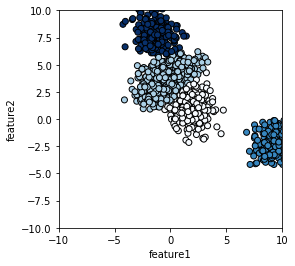

In [26]:
# Task 0 to create an analogue of KMeans:
import pdb
def kmeans(mtx, n_clusters = 2):
    set_help = set()
    list_index = []#index of centers
    while len(set_help) < n_clusters:
        num = np.random.randint(0, mtx.shape[0])
        if num not in set_help:
            set_help.add(num)
            list_index.append(num)
    
    # first step to initialize     
    list_centres1 = np.array([mtx[i] for i in list_index])  
    ret_list = np.arange(mtx.shape[0])
    
    # we want assign centers to our data points
    for i in range(0, mtx.shape[0]):
        arg_list = np.arange(n_clusters)
        for j in range(0, n_clusters):
            arg_list[j] = (np.linalg.norm(mtx[i] - list_centres1[j])) ** 2
        ret_list[i] = np.argmin(arg_list)
    list_centres2 = np.array([mtx[i] for i in list_index])       
    # we want to recalculate our centers
    for i in range(0, n_clusters):
        count = 0
        sum = np.zeros(mtx.shape[-1])
        for j in range(0, mtx.shape[0]):
            if ret_list[j] == i:
                count += 1
                sum += mtx[j]
                       
        if count != 0:
            list_centres2[i] = sum / count
        else:
            list_centres2[i] = list_centres1[i]  
    # main loop np.sum(np.fabs(list_centres1 - list_centres2))
    while np.linalg.norm(list_centres1 - list_centres2) > 0.01:
        list_centres1 = np.copy(list_centres2) 
        ret_list = np.arange(mtx.shape[0])
        
        for i in range(0, mtx.shape[0]):
            arg_list = np.arange(n_clusters)
            for j in range(0, n_clusters):
                arg_list[j] = (np.linalg.norm(mtx[i] - list_centres1[j])) ** 2
            ret_list[i] = np.argmin(arg_list)
        list_centres2 = np.array([mtx[i] for i in list_index])
        
        for i in range(0, n_clusters):
            count = 0
            sum = np.zeros(mtx.shape[-1])
            for j in range(0, mtx.shape[0]):
                if ret_list[j] == i:
                    count += 1
                    sum += mtx[j]
                     
            if count != 0:
                list_centres2[i] = sum / count
            else:
                list_centres2[i] = list_centres1[i]  
        
    return ret_list

clusters = kmeans(X, 4)
Scat_graph(X[:,0], X[:,1], clusters)  

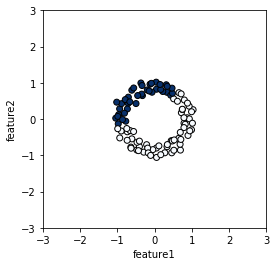

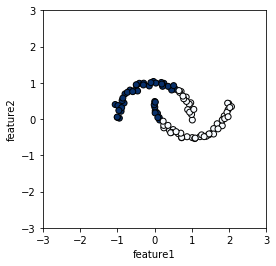

In [30]:
from sklearn.datasets import make_circles, make_moons

n_samples = 100
noisy_circles = make_circles(n_samples = n_samples, factor = .8, noise = .05)
noisy_moons = make_moons(n_samples = n_samples, noise = .05)

clusters = kmeans(noisy_circles[0], 2)
Scat_graph(noisy_circles[0][:, 0], noisy_circles[0][:,1], clusters,i = 3)

clusters = kmeans(noisy_moons[0], 2)
Scat_graph(noisy_moons[0][:,0], noisy_moons[0][:,1], clusters, i = 3)
#To solve such task we should suggest another metrics!!!

# Later on I am using KMeans from Sklearn!

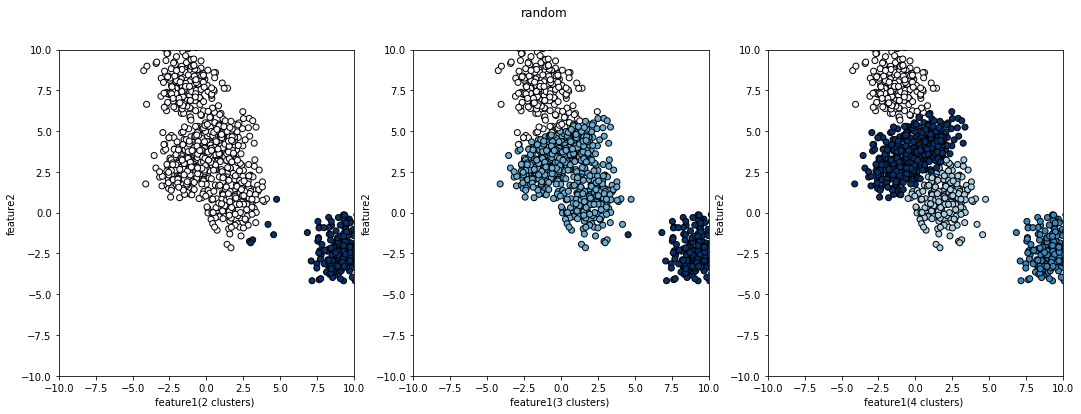

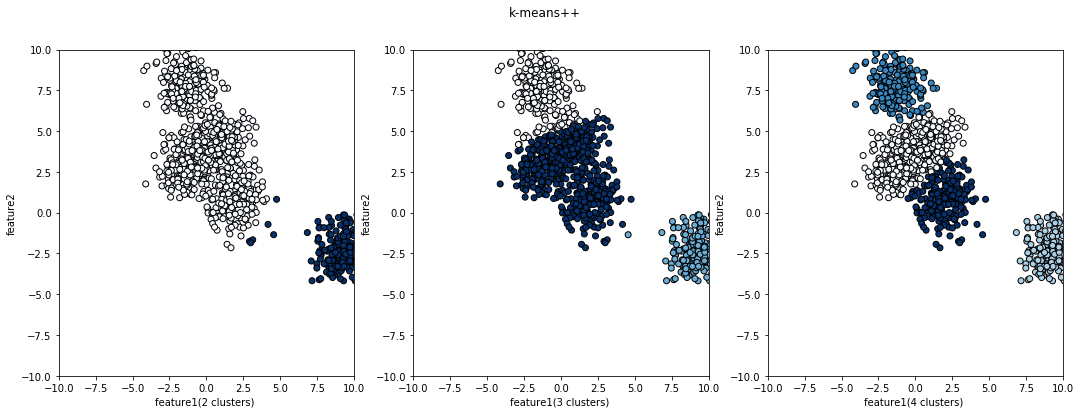

31.8 ms ± 3.92 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.9 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# Task 1 : strategy of initialization??? init : ‘k-means++’ or ‘random’ ?
X,y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 0)
Scat_graph_comp(X[:,0], X[:,1], X, 'random')
Scat_graph_comp(X[:,0], X[:,1], X, 'k-means++')

%timeit clusters = KMeans(n_clusters = 3, random_state = 0, init = 'random').fit_predict(X)
%timeit clusters = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++').fit_predict(X)

In [ ]:
# Conclusion: we cannot emphasize any visible differences between 'random' and 'k-maens++' strategy. However,
# it takes a bit more time to apply "k-means++".


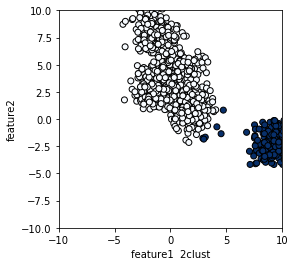

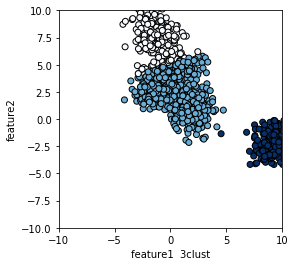

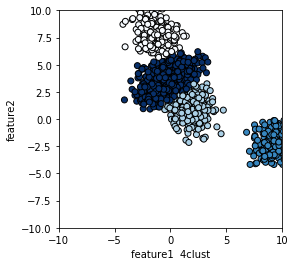

In [6]:
# Task 2 : What tasks can we cover using this algorithm?
# We can solve only tasks where we know about the number of clusters or can suggest it at least based on something
# as it is our input( "n_clusters" )

# It is important because the same algorithm can solve a definite task in different ways:

X,y = make_blobs(n_samples = 1000, n_features = 2, centers = 5, random_state = 0)

clusters = KMeans(n_clusters = 2, random_state = 0, init = 'random').fit_predict(X)
Scat_graph(X[:,0], X[:,1], clusters, '  2clust')

clusters = KMeans(n_clusters = 3, random_state = 0, init = 'random').fit_predict(X)
Scat_graph(X[:,0], X[:,1], clusters, '  3clust')

clusters = KMeans(n_clusters = 4, random_state = 0, init = 'random').fit_predict(X)
Scat_graph(X[:,0], X[:,1], clusters, '  4clust')

In [46]:
# Consequentaly, we can divide our set in different ways but what way is necessary? we should know about it

In [ ]:
# Task 3: Suggest and explore the way of selecting number of clusters(smth general-purpose):
# Generally speaking we should figure out some quality metric to realise what number of clusters is appropriate here!




In [7]:
# Task 4: Explore dependence of the settings from volume of data(difficulty of data):

for i in range(1000, 10000, 1000):
    print("\nHere we have " + str(i) + " samples:")  
    X,y = make_blobs(n_samples = i, n_features = 2, centers = 5, random_state = 0)
    %timeit clusters = KMeans(n_clusters = 3, random_state = 0, init = 'random').fit_predict(X)




Here we have 1000 samples:
31.2 ms ± 2.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 2000 samples:
57.4 ms ± 3.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 3000 samples:
50.5 ms ± 4.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 4000 samples:
63.1 ms ± 7.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 5000 samples:
56 ms ± 3.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 6000 samples:
55.5 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 7000 samples:
62.8 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 8000 samples:
85.6 ms ± 192 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

Here we have 9000 samples:
78.5 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# To sum it up, we can see that more data more time we have to do clastering
# Speaking of the difficulty of data, our algorithm does not depend on that, it is inaccurate term in such task.
# Our method is very straightforward that`s why it can detect any complexity at all, we just want to do some math
# calculations.


In [13]:
# Task 5: Heuristics for visualization of pairwise distance matrix:
